Load the Complete Evaluation Table and aggregate the Absolute Errors by Mean --> generating MAE

In [ ]:
import pandas as pd

# We concatenate the evaluation results of the quantifiers and the ensemble quantifier
# to have a single table for the evaluation results

# EXPERIMENT 1
# Meta-features extraidas de full set, sem normalização
# Quantificadores treinados em train set, com zscore
# Quantificadores avaliados em test set, com zscore

# EXPERIMENT 2
# Meta-features extraidas de train set, com zscore
# Quantificadores treinados em train set, com zscore
# Quantificadores avaliados em test set, com zscore

# EXPERIMENT 3 (AINDA NÃO FEITO)
# Meta-features extraidas de train set, sem normalização
# Quantificadores treinados em train set, com zscore
# Quantificadores avaliados em test set, com zscore

path = "./plot_data/experiment-1/"

quantifiers_eval = pd.read_csv(path+"reg_quantifiers_evaluation_table.csv")
reg_ensemble_quantifier_eval = pd.read_csv(path+"reg_ensemble_quantifier_evaluation_table.csv")
knn_ensemble_quantifier_eval = pd.read_csv(path+"knn_ensemble_quantifier_evaluation_table.csv")
eval_table = pd.concat([quantifiers_eval, reg_ensemble_quantifier_eval, knn_ensemble_quantifier_eval], axis=0)


eval_table = eval_table.groupby(["quantifier", "dataset"]).agg(
        abs_error = pd.NamedAgg(column="abs_error", aggfunc="mean"),
        run_time = pd.NamedAgg(column="run_time", aggfunc="mean")
    )
eval_table.reset_index(inplace=True)

def remove_quantifiers(df, quantifiers):
    return df[~df['quantifier'].isin(quantifiers)]

quantifiers_to_remove = [
    '(KNN)Top-1',
    '(KNN)Top-2',
    '(KNN)Top-3',
    '(KNN)Top-4',
    '(KNN)Top-5',
    '(KNN)Top-6',
    '(KNN)Top-7',
    '(KNN)Top-8',
    '(KNN)Top-9',
    '(KNN)Top-10',
    '(KNN)Top-11',
    '(KNN)Top-1+W',
    '(KNN)Top-2+W',
    '(KNN)Top-3+W',
    '(KNN)Top-4+W',
    '(KNN)Top-5+W',
    '(KNN)Top-6+W',
    '(KNN)Top-7+W',
    '(KNN)Top-8+W',
    '(KNN)Top-9+W',
    '(KNN)Top-10+W',
    '(KNN)Top-11+W',
    # '(REG)Top-1',
    '(REG)Top-2',
    # '(REG)Top-3',
    '(REG)Top-4',
    # '(REG)Top-5',
    '(REG)Top-6',
    '(REG)Top-7',
    '(REG)Top-8',
    '(REG)Top-9',
    '(REG)Top-10',
    '(REG)Top-11',
    '(REG)Top-1+W',
    '(REG)Top-2+W',
    # '(REG)Top-3+W',
    '(REG)Top-4+W',
    # '(REG)Top-5+W',
    '(REG)Top-6+W',
    '(REG)Top-7+W',
    '(REG)Top-8+W',
    '(REG)Top-9+W',
    '(REG)Top-10+W',
    '(REG)Top-11+W',
]
eval_table = remove_quantifiers(eval_table, quantifiers_to_remove)

Generate Ranking Plots by Error

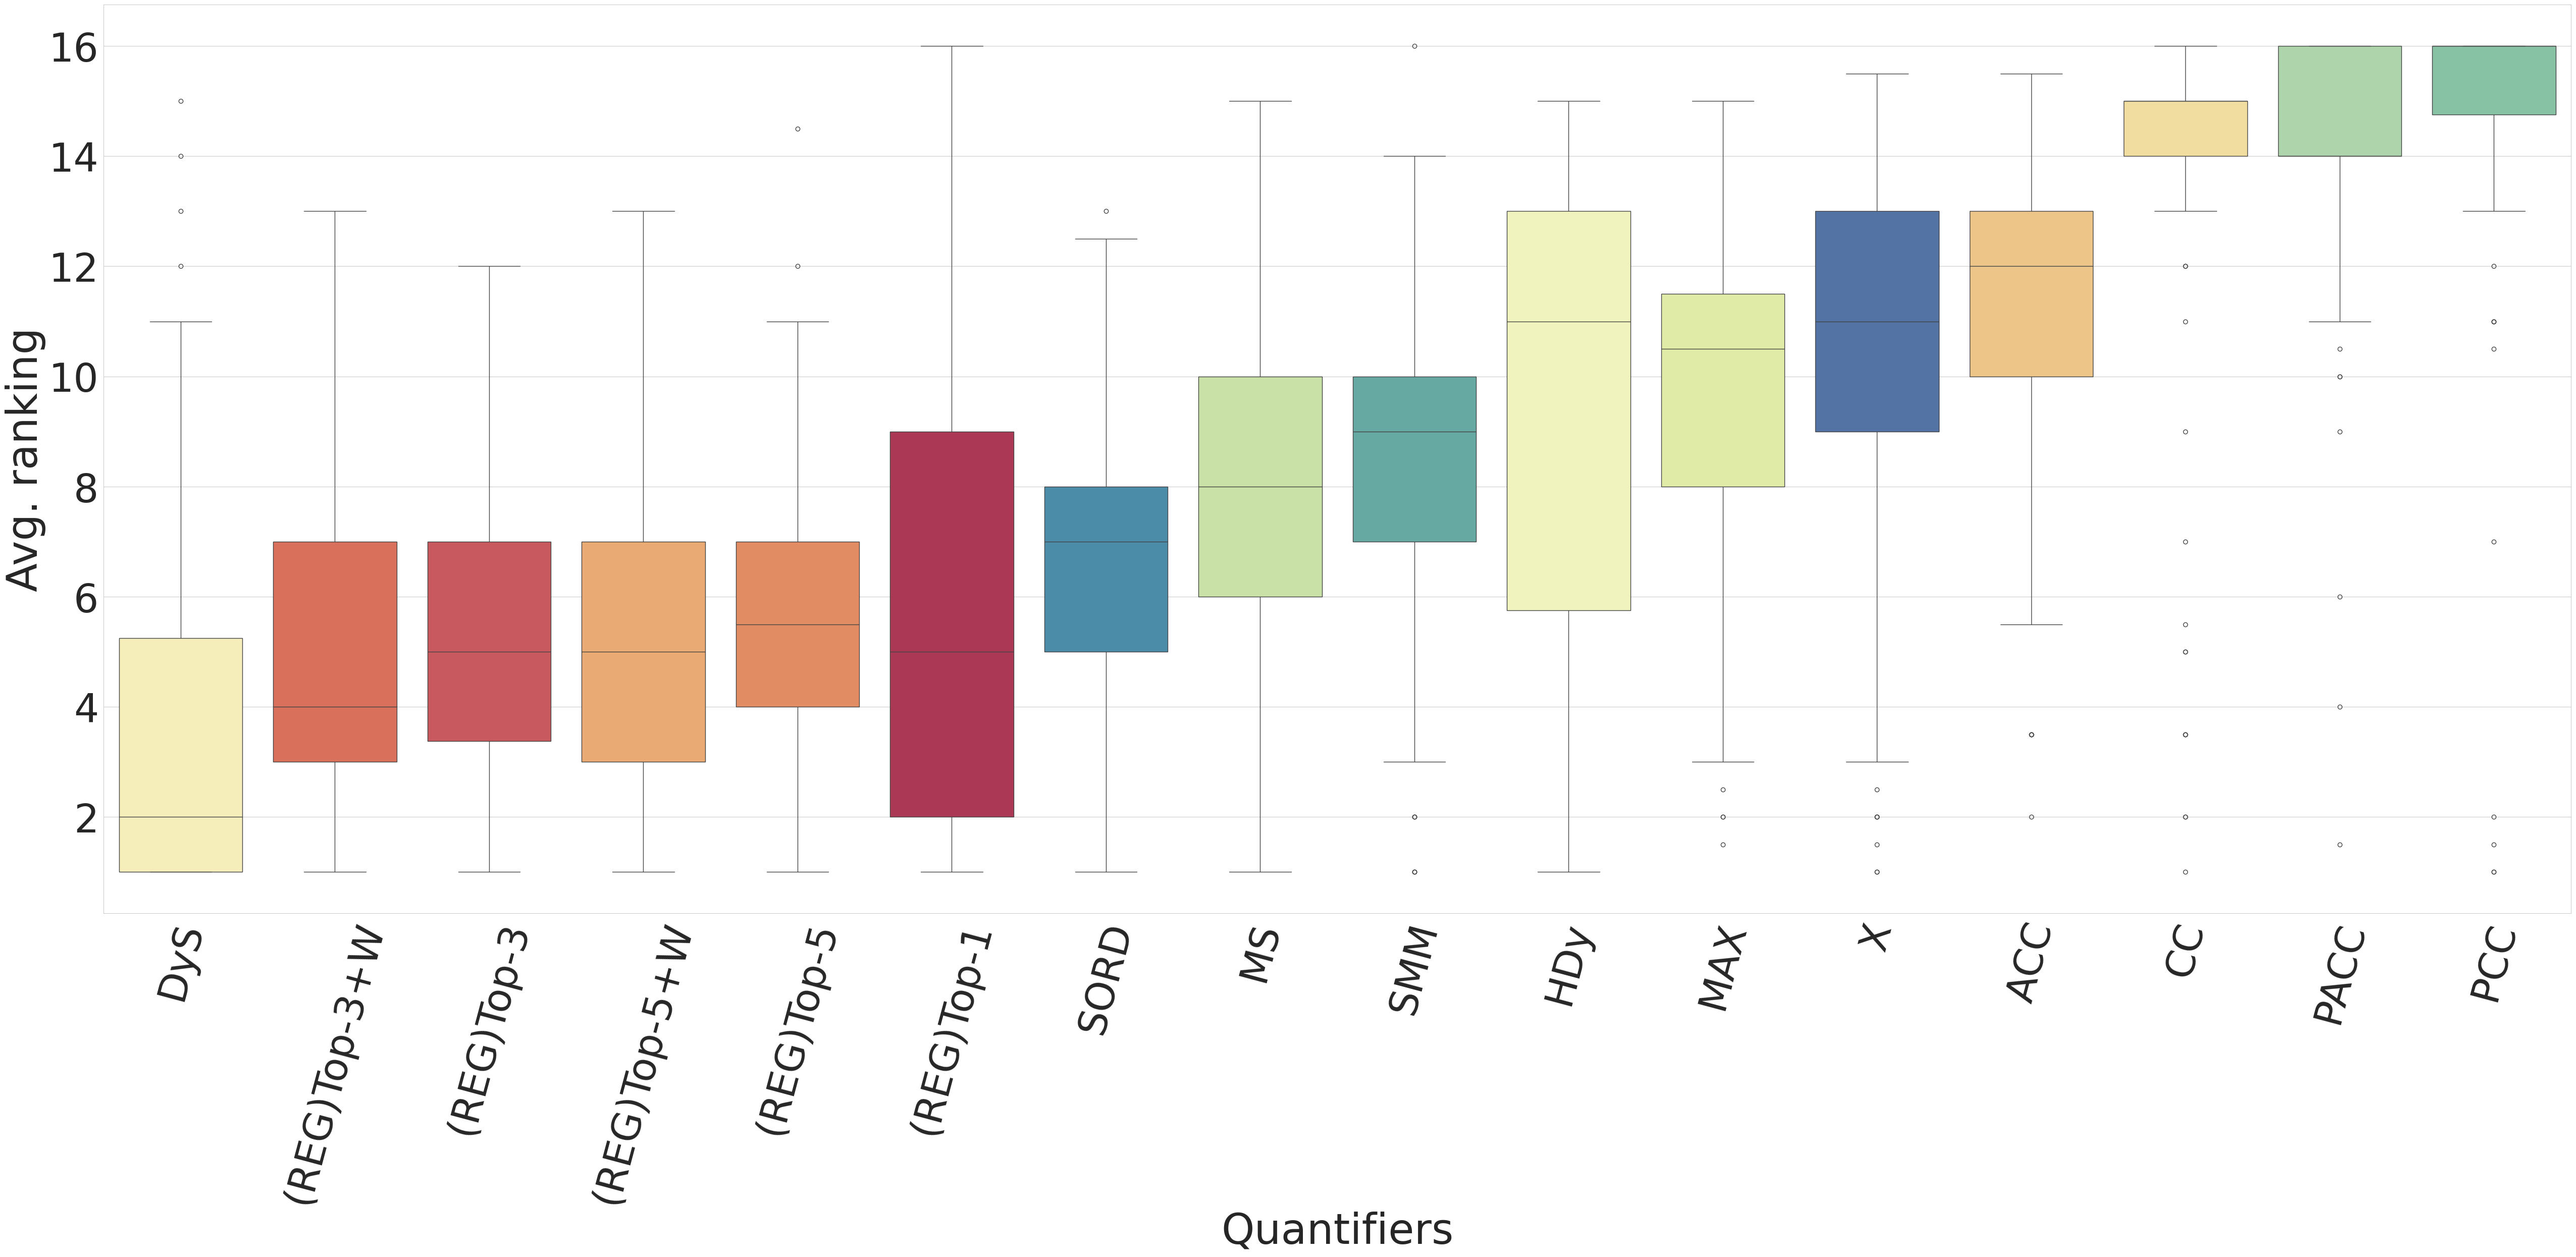

,quantifier,dataset,abs_error,run_time,error_rank
2200,(REG)Top-1,1043_ada_agnostic,0.046386,0.045409,2.0
2201,(REG)Top-1,1460_banana,0.066850,0.207320,1.0
2202,(REG)Top-1,1462_banknote-authentication,0.014750,0.000008,13.0
2203,(REG)Top-1,1466_cardiotocography,0.000000,0.024659,3.5
2204,(REG)Top-1,1475_first-order-theorem-proving,0.066985,0.046078,7.0
...,...,...,...,...,...
5495,X,spambase,0.023555,0.000245,10.0
5496,X,sylva_prior,0.006520,0.000266,7.0
5497,X,visualizing_soil,0.002000,0.000253,1.5
5498,X,wind,0.035743,0.000247,11.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .24 # .23
plt_width = 52 # 38
plt_heigth = 24 # 18
plot_rotation = 75
axis_font_size = 56 # 50
labels_size = 60 # 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['dataset'], as_index=False )['abs_error'].rank(method='average', ascending = True)

    order = sample.groupby('quantifier')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['quantifier'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width, plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='quantifier', y='error_rank', order = order, palette = palette, hue='quantifier', legend=False)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    # if file != "":
    #     ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

boxplotMae(eval_table)